<a href="https://colab.research.google.com/github/omerkucukacar/bby261FinalProjesi/blob/master/bby261FinalProjesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#okunacak kütüphanaler
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt





In [0]:
mnist = mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
testX = X_test.reshape((X_test.shape[0], 28, 28, 1))
trainX = trainX/255
testX = testX/255

In [0]:
# El yazısının tahmin edileceği rakamlar
el_yazisi = [
               '0', 
              '1', 
               '2',
               '3', 
              '4',
               '5',
               '6', 
               '7',
               '8', 
               '9']



               

In [346]:
X_train.shape


(60000, 28, 28)

In [347]:
len(y_train)

60000

In [348]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [349]:
X_test.shape

(10000, 28, 28)

In [350]:
len(y_test)

10000

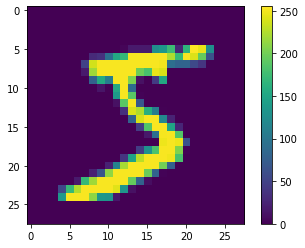

In [351]:
import matplotlib.pyplot as plt


plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

# El yazısı Şeklinde Grafiği göster
plt.show()


In [0]:
X_train = X_train / 255.0

X_test = X_test / 255.0

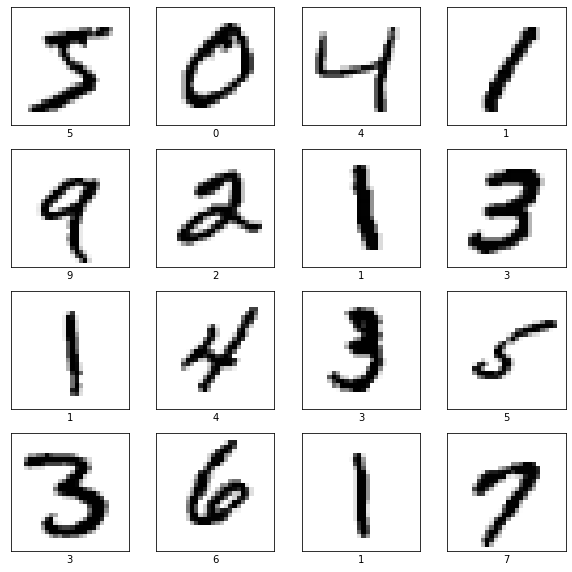

In [353]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(el_yazisi[y_train[i]])
plt.show()

In [0]:
trainY =(y_train,10)
testY = (y_test,10)

In [0]:
benimmodelim= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [0]:
benimmodelim.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [357]:
benimmodelim.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [358]:
benimmodelim.fit(X_train, y_train, epochs=10 )


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2663 - acc: 0.9240
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1176 - acc: 0.9650
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0796 - acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0597 - acc: 0.9810
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0458 - acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0367 - acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0294 - acc: 0.9908
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0240 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0192 - acc: 0.9940
Epoch 10/10
60000/60000 [==============================] - 

In [359]:
Test_kayiplari, test_sonuc = benimmodelim.evaluate(X_test,  y_test, verbose=2)

print('Test sonucu doğruluğu=', test_sonuc)

10000/10000 - 0s - loss: 0.0758 - acc: 0.9793
Test sonucu doğruluğu= 0.9793


In [360]:
y_test[0]

7

In [0]:
sonuc_tahmin = benimmodelim.predict(X_test)

In [362]:
sonuc_tahmin[0]

array([1.0727106e-08, 2.1258618e-08, 6.4504371e-07, 3.3432673e-04,
       2.0232533e-11, 2.8920956e-08, 1.4270802e-13, 9.9966097e-01,
       4.7106230e-08, 3.9954070e-06], dtype=float32)

In [363]:
np.argmax(sonuc_tahmin[0])

7

In [364]:
y_test[0]

7

In [0]:
def plot_image(i, sonuc_tahmin_array, true_label, img):
  sonuc_tahmin_array, true_label, img = sonuc_tahmin_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(sonuc_tahmin_array)
  if predicted_label == true_label:
    color = 'brown'
  else:
    color = 'orange'

  plt.xlabel("{} {:2.0f}% ({})".format(el_yazisi[predicted_label],
                                100*np.max(sonuc_tahmin_array),
                               el_yazisi[true_label]),
                                color=color)

def plot_value_array(i, sonuc_tahmin_array, true_label):
 sonuc_tahmin_array, true_label = sonuc_tahmin_array, true_label[i]
  
  

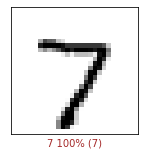

In [366]:

i = 0
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plot_image(i, sonuc_tahmin[i], y_test, X_test)



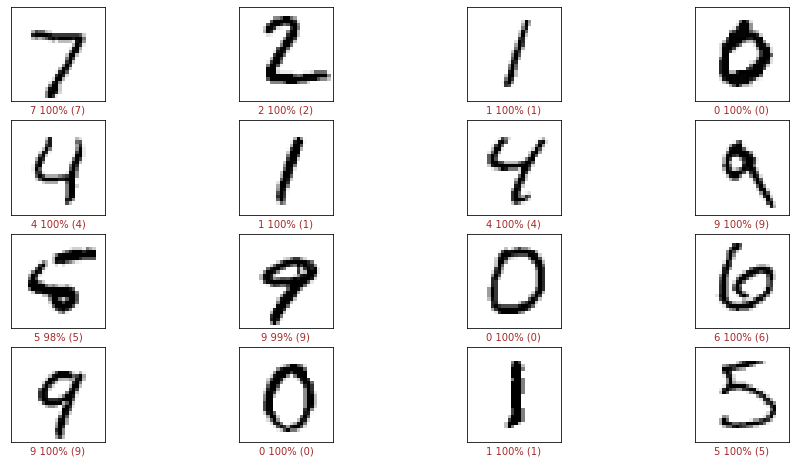

In [367]:


# İlk X test görüntüsünü, tahmin edilen etiketlerini ve gerçek etiketleri çizin.
# Mavi renkte doğru tahminler ve kırmızıda yanlış tahminler.
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, sonuc_tahmin[i], y_test, X_test)
  
 


In [368]:

# Test veri kümesinden bir görüntü alın.
img = X_test[1]

print(img.shape)

(28, 28)


In [369]:

# Görüntüyü tek üye olduğu bir gruba ekleyin.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)
